REGRESION LINEAL 

Paso 1: Carga del conjunto de datos
Paso 2: Realiza un EDA completo
Paso 3: Construye un modelo de regresión lineal
Paso 4: Optimiza el modelo anterior


PASO 1: carga conjunto de datos 

In [1]:
import seaborn as sns

#import seaborn as sns
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

print (total_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS 

sumarizamos con shape e info

In [2]:
total_data.shape

(1338, 7)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


tenemos : 

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numerico) TARGET

var= ["sex", "smoker", "region", "region","age", "bmi", "children", "charges" ]
var_num = ["sex_n", "smoker_n", "region_n","age", "bmi", "children", "charges" ]
variables categoricas
var= ["sex", "smoker", "region"]
variables numéricas 
var= ["age", "bmi", "children", "charges"]

ningun valor nulo 

duplicados 

In [4]:
total_data.duplicated().sum()
duplicados = total_data[total_data.duplicated(keep=False)]
print(duplicados)


     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [5]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
total_data.duplicated().sum()


0

quitadas 

eliminacion de columnas irrelevantes. prefiero ser conservador y esperar al features selection 

PASO 3: ANALISIS VARIABLES UNIVARIANTE 

VARIABLES CATEGORICAS: 

In [8]:
total_data.info()

total_data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

vamos con las categóricas 

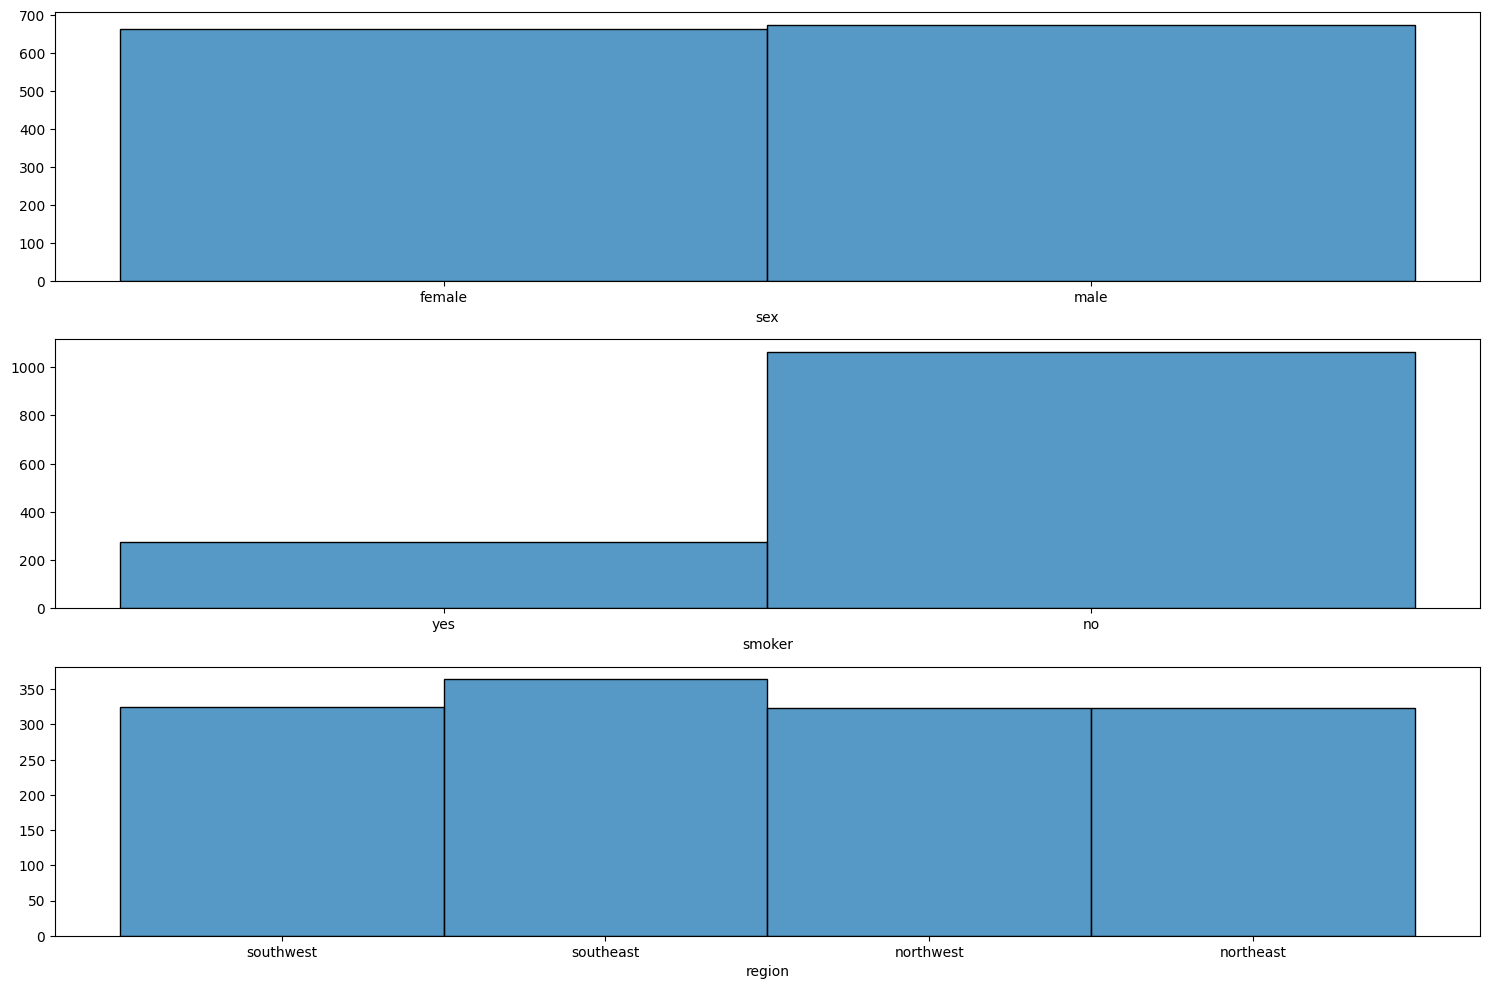

In [10]:
var= ["sex", "smoker", "region"]





import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, figsize = (15, 10))


sns.histplot(ax = axis[0], data = total_data, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[1], data = total_data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "region").set(ylabel = None)




# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



algo más hombres, no fumadores, algo más del suereste 

ahora las numéricas, me fijo sobre todo en la target charges 

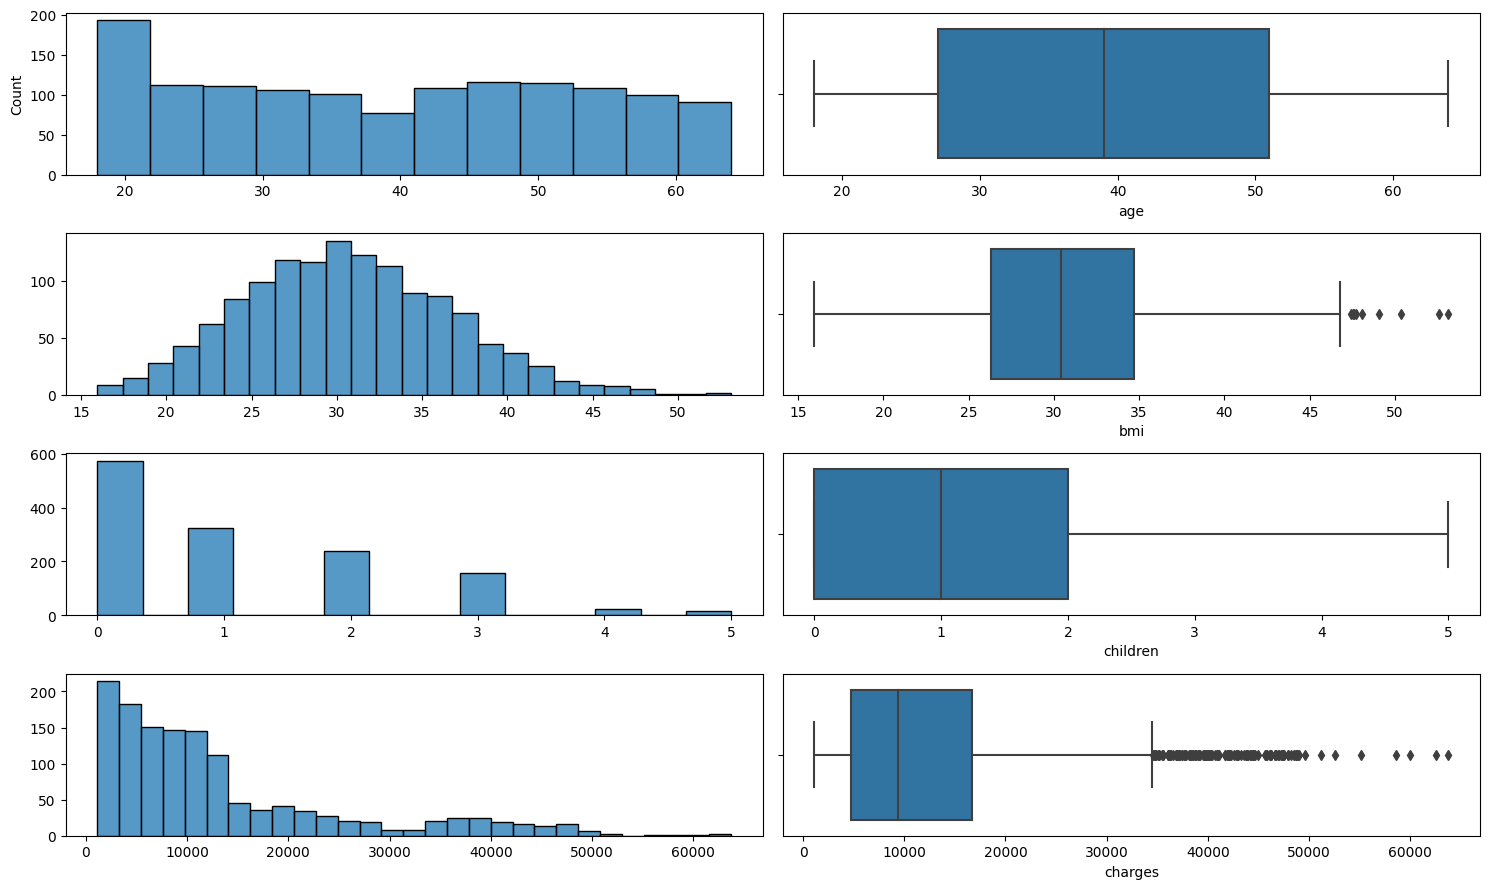

In [11]:
var= ["age", "bmi", "children", "charges"]

fig, axis = plt.subplots(4, 2, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 1, 1, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[0, 1], data = total_data, x = "age")
sns.histplot(ax = axis[1, 0], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = total_data, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[2, 1], data = total_data, x = "children")
sns.histplot(ax = axis[3, 0], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "charges")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

perfil mayoritario: 20 años, 30 bmi, sin hijos, hasta unos 10.000 de seguro 
dispersión : en bmi y sobre todo charges 

PASO 4 ANALISIS DE VARIABLES MULTIVARIANTE 

ANALISIS NUMERICO NUMERICO 

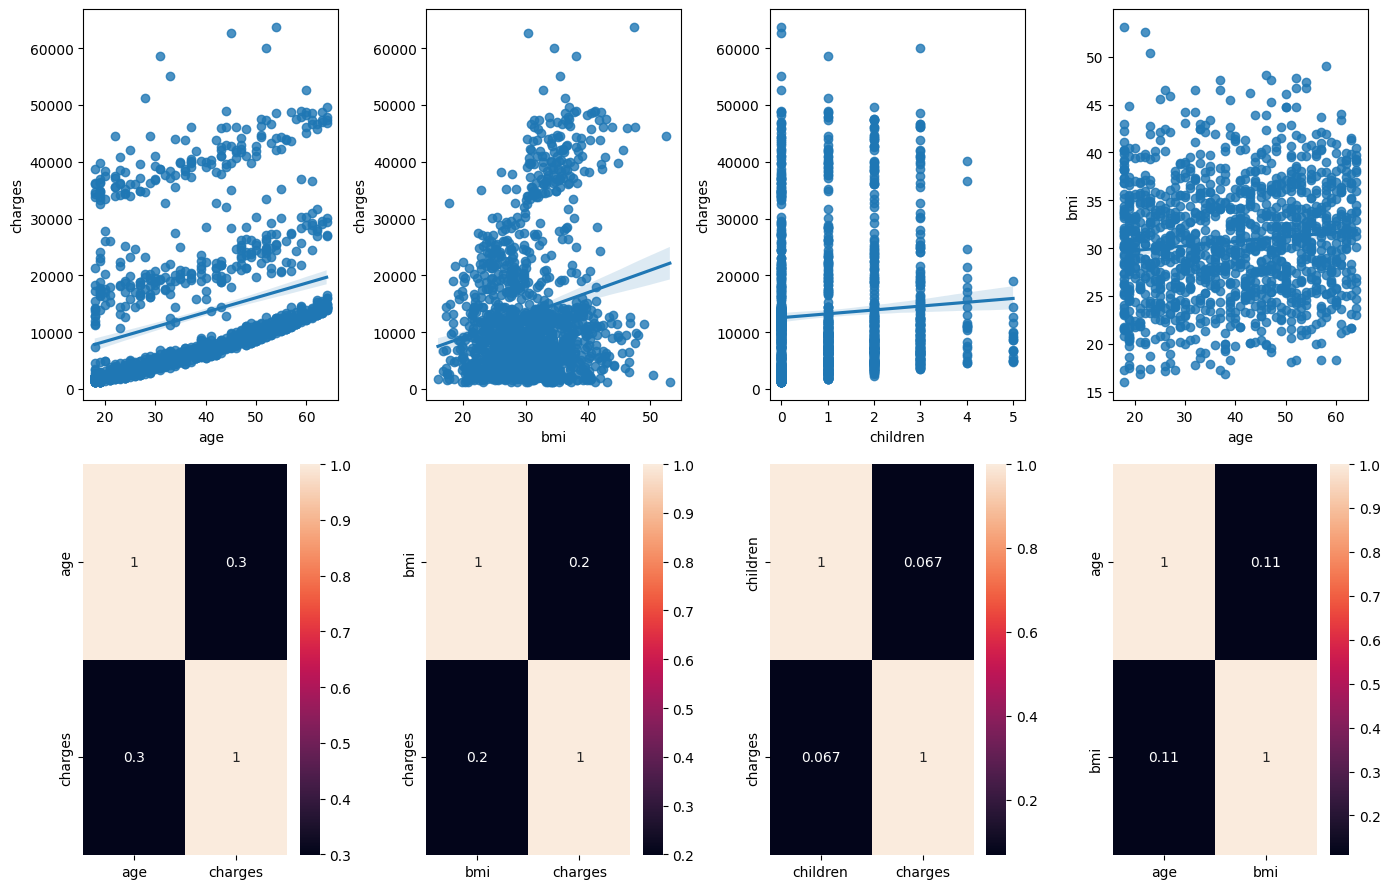

<Figure size 640x480 with 0 Axes>

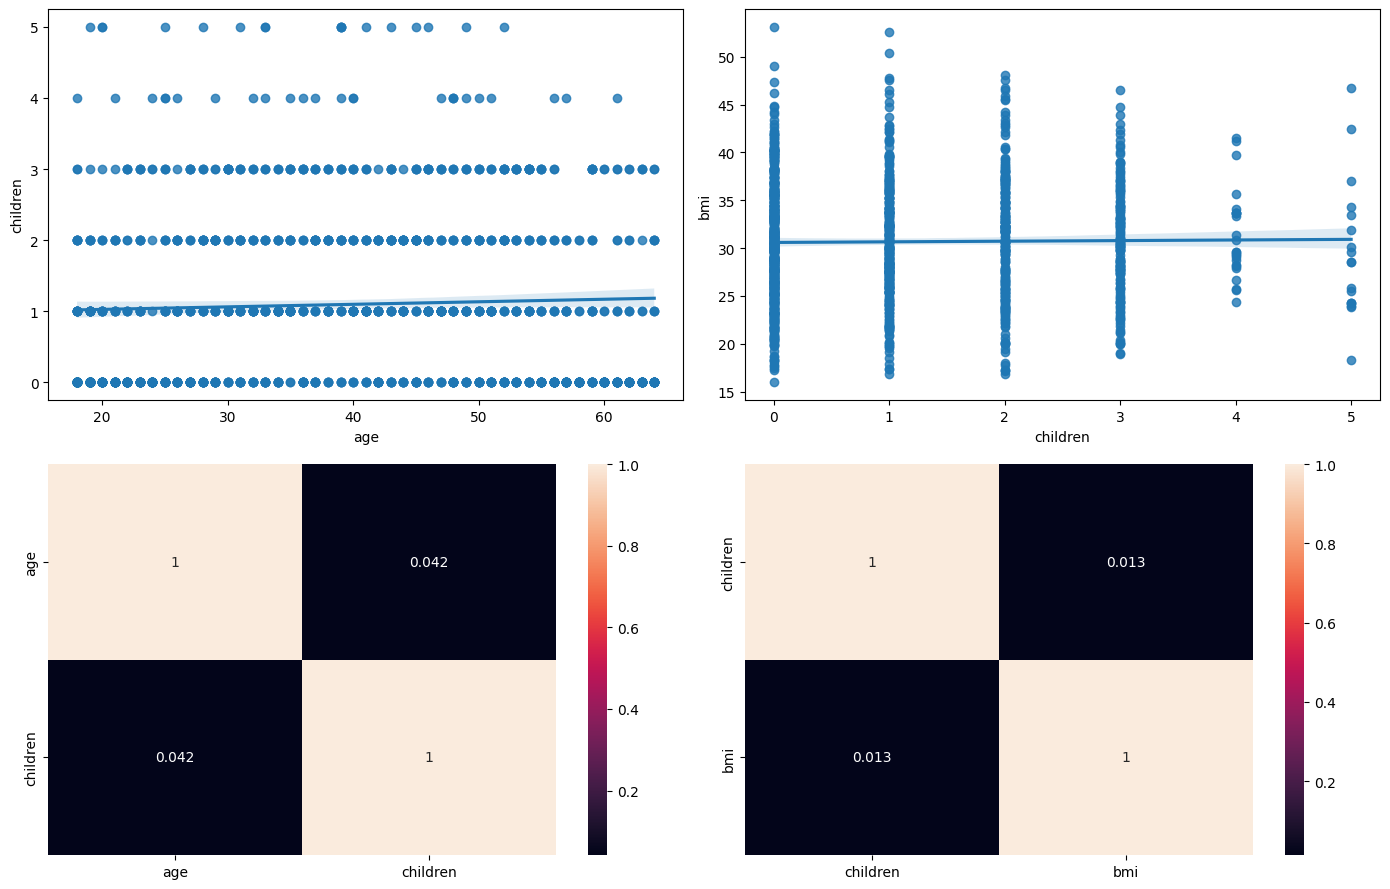

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vars = ["age", "bmi", "children", "charges"] 
fig, axis = plt.subplots(2, 4, figsize=(14, 9))
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges")
sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges")
sns.regplot(ax=axis[0, 2], data=total_data, x="children", y="charges")
sns.regplot(ax=axis[0, 3], data=total_data, x="age", y="bmi")

sns.heatmap( total_data[["age", "charges"]].corr(), ax=axis[1, 0], annot = True )
sns.heatmap( total_data[["bmi", "charges"]].corr(), ax=axis[1, 1], annot = True )
sns.heatmap( total_data[["children", "charges"]].corr(), ax=axis[1, 2], annot = True )
sns.heatmap( total_data[["age", "bmi"]].corr(), ax=axis[1, 3], annot = True )

plt.tight_layout()
plt.show()

plt.clf()

fig, axis = plt.subplots(2, 2, figsize=(14, 9))
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="children")
sns.regplot(ax=axis[0, 1], data=total_data, x="children", y="bmi")

sns.heatmap( total_data[["age", "children"]].corr(), ax=axis[1, 0], annot = True )
sns.heatmap( total_data[["children", "bmi"]].corr(), ax=axis[1, 1], annot = True )


plt.tight_layout()
plt.show()

en cuanto a correlación: la edad y el bmi influyen en charges, 
hay también correlación en edad y bmi, menor 

ANALISIS CATEGORICO CATEGORICO

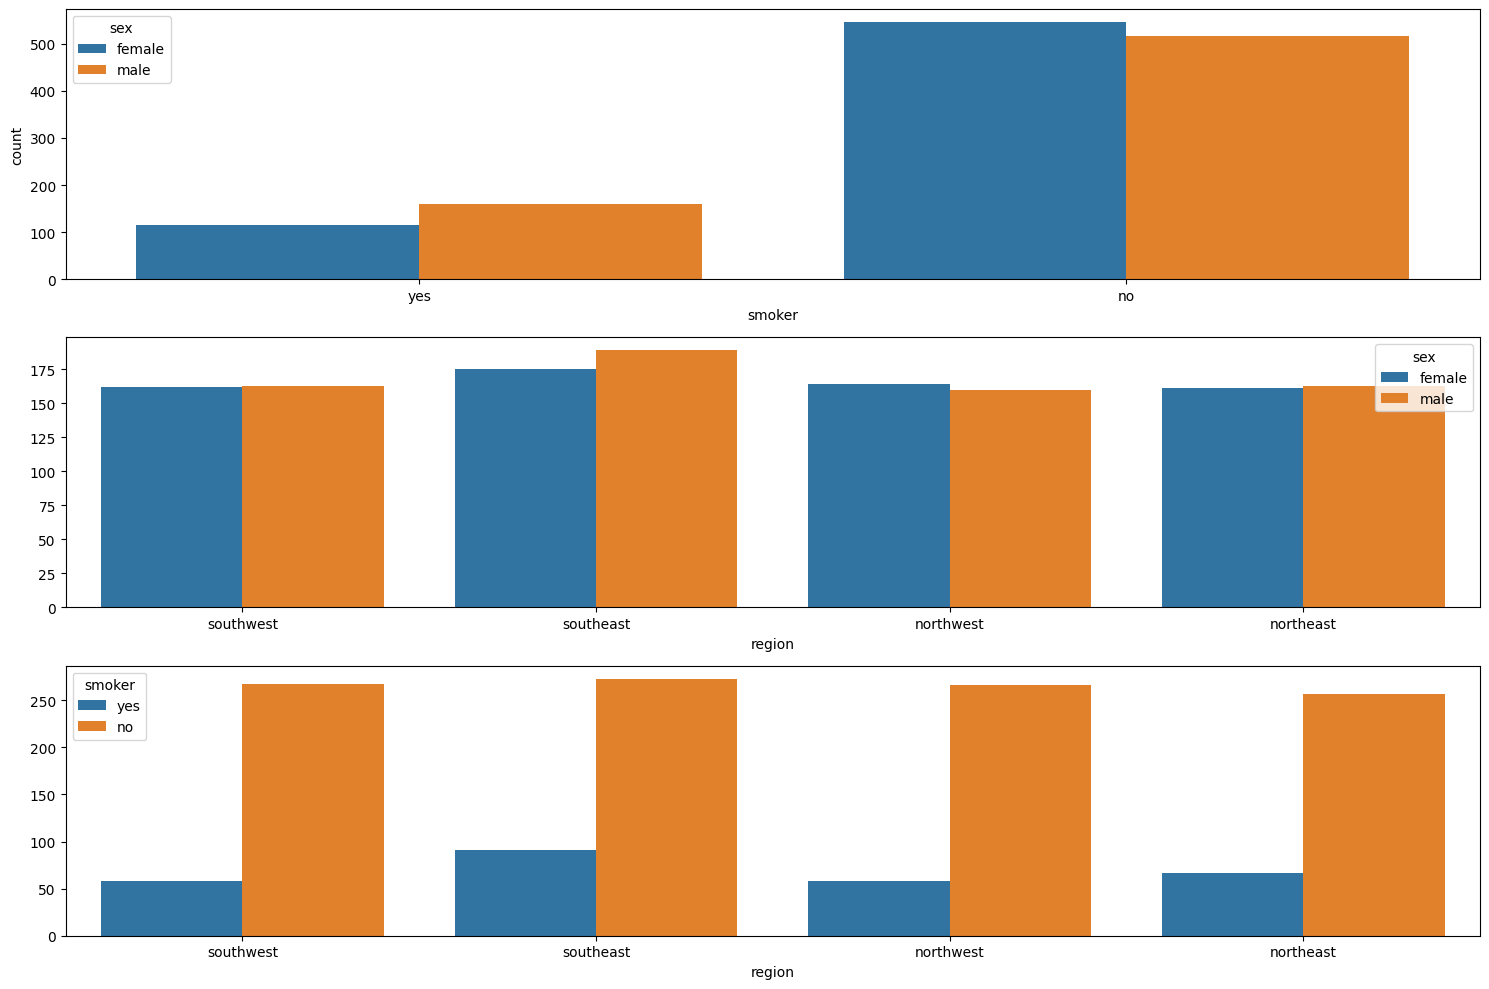

In [13]:
var= ["sex", "smoker", "region"]

fig, axis = plt.subplots(3, figsize = (15, 10))

sns.countplot(ax = axis[0], data = total_data, x = "smoker", hue = "sex")
sns.countplot(ax = axis[1], data = total_data, x = "region", hue = "sex").set(ylabel = None)
sns.countplot(ax = axis[2], data = total_data, x = "region", hue = "smoker").set(ylabel = None)


plt.tight_layout()


plt.show()

hay más no fumadores que fumadores, lo hombres fuman más
en southeast, más hombres, en northwest más mujeres, equilibrado. 
los que fuman más en southeast, aunque hay sobre todo no fumadores 

ANALISIS DE CORRELACIONES

factorizamos las variables categóricas. 

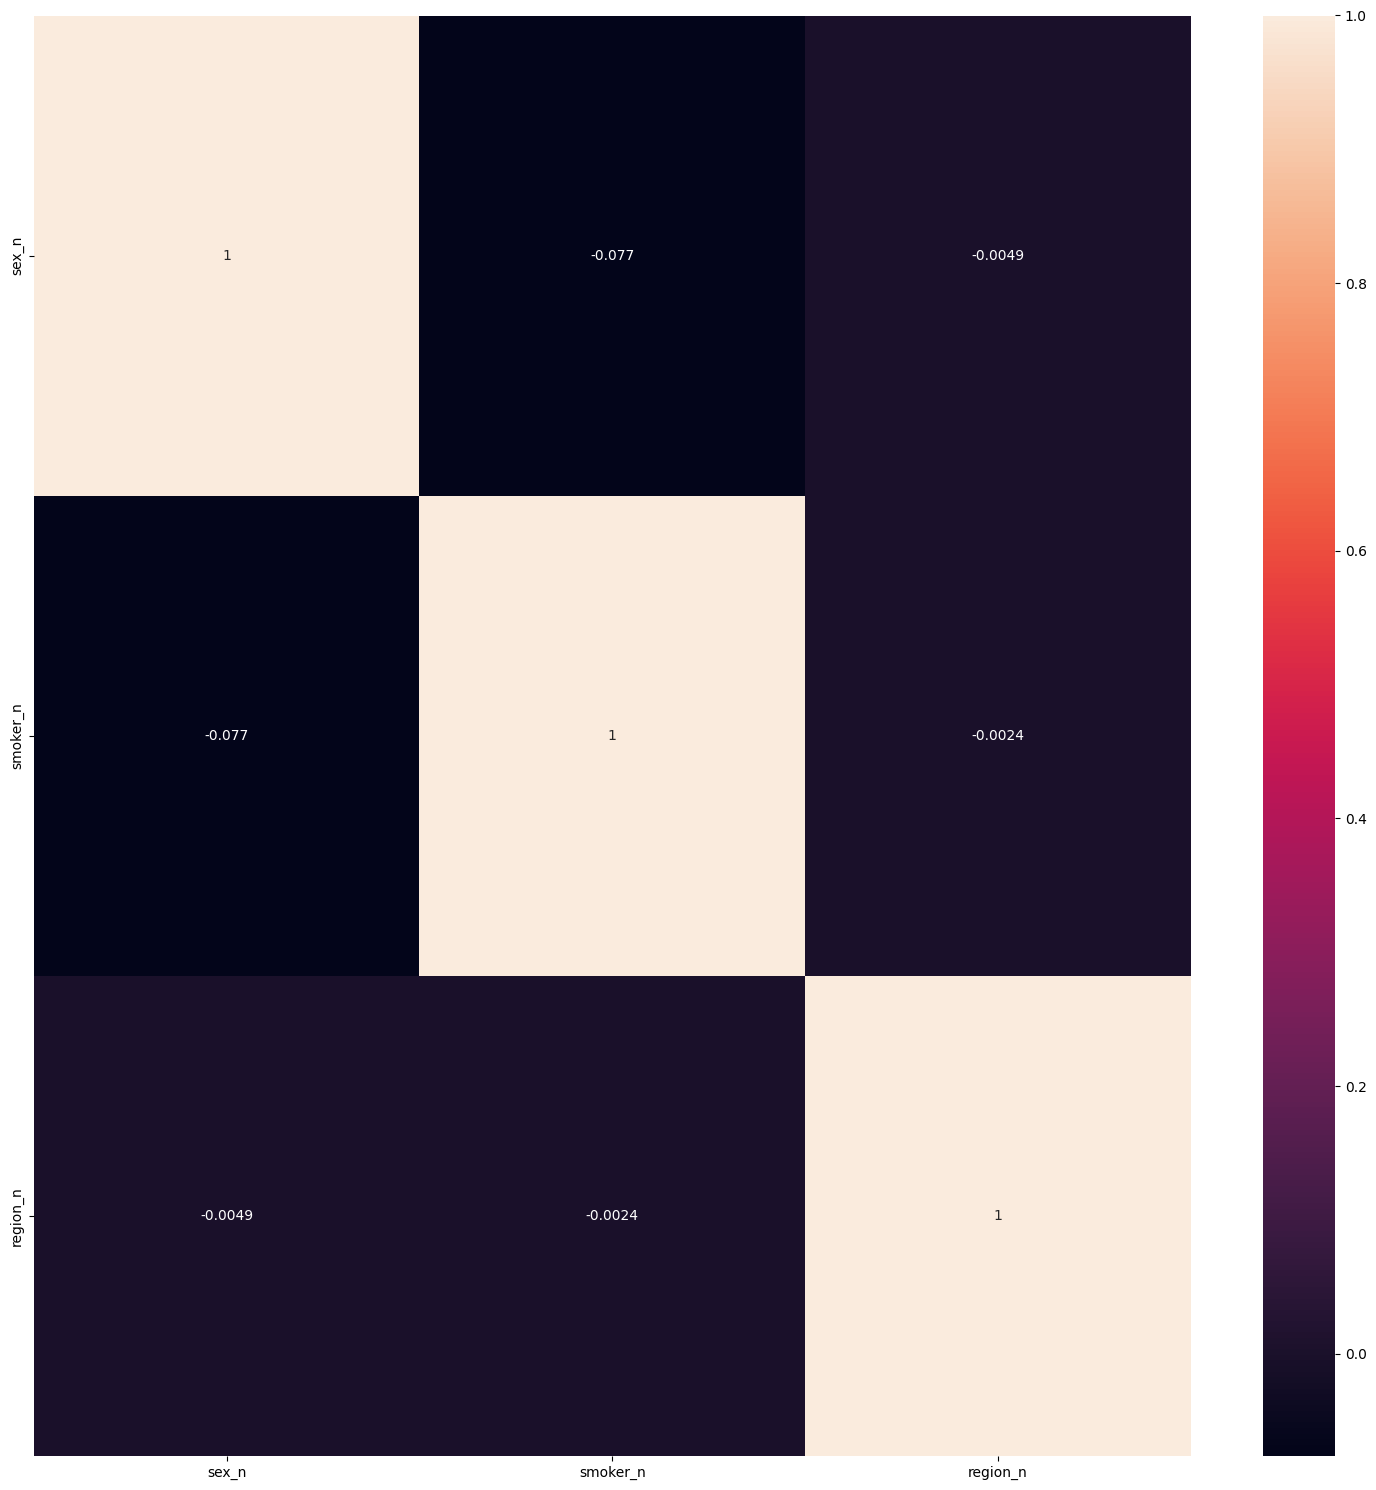

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [14]:
import matplotlib.pyplot as plt

var= ["sex", "smoker", "region"]



total_data["sex_n"] = pd.factorize( total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize( total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"] )[0]

fig, size = plt.subplots( figsize = (15,15))
sns.heatmap(total_data[["sex_n","smoker_n","region_n"]].corr(), annot = True)
plt.tight_layout()
plt.show()

total_data 

muy poca correlación 

ahora todas las variables 

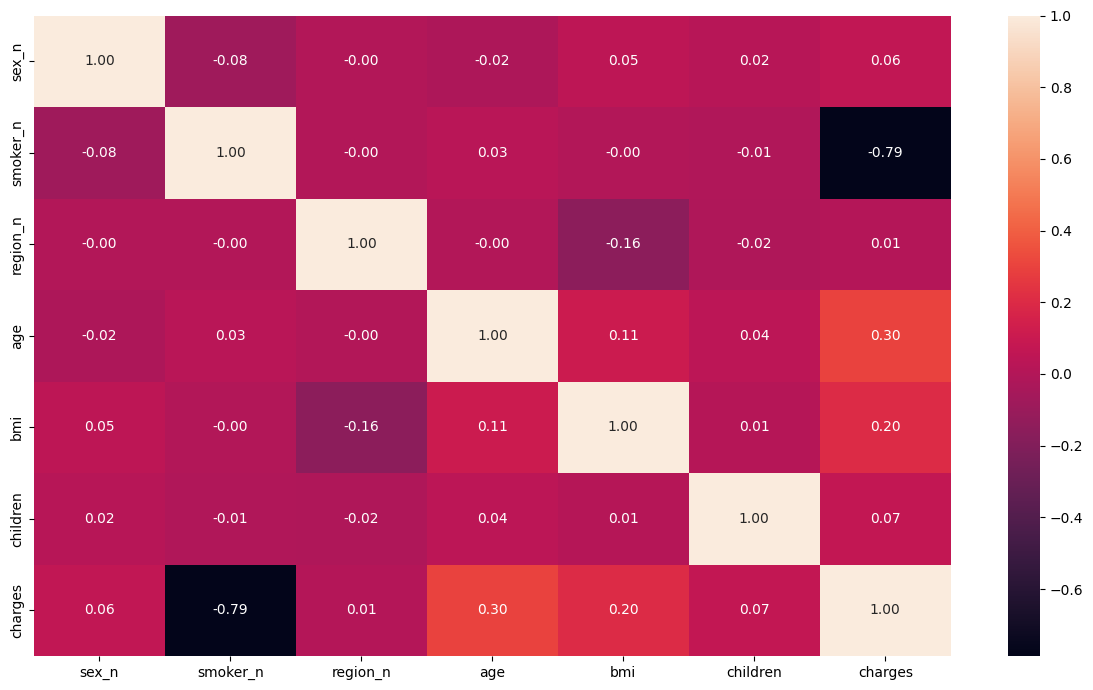

In [15]:

fig, axis = plt.subplots(figsize = (12, 7))

sns.heatmap(total_data[["sex_n", "smoker_n", "region_n","age", "bmi", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

sacamos correlación directa de age charges, bmi charges , en menor medida bmi age 
sacamos correlación inversa entre charges y smoker

hago pairplot 

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


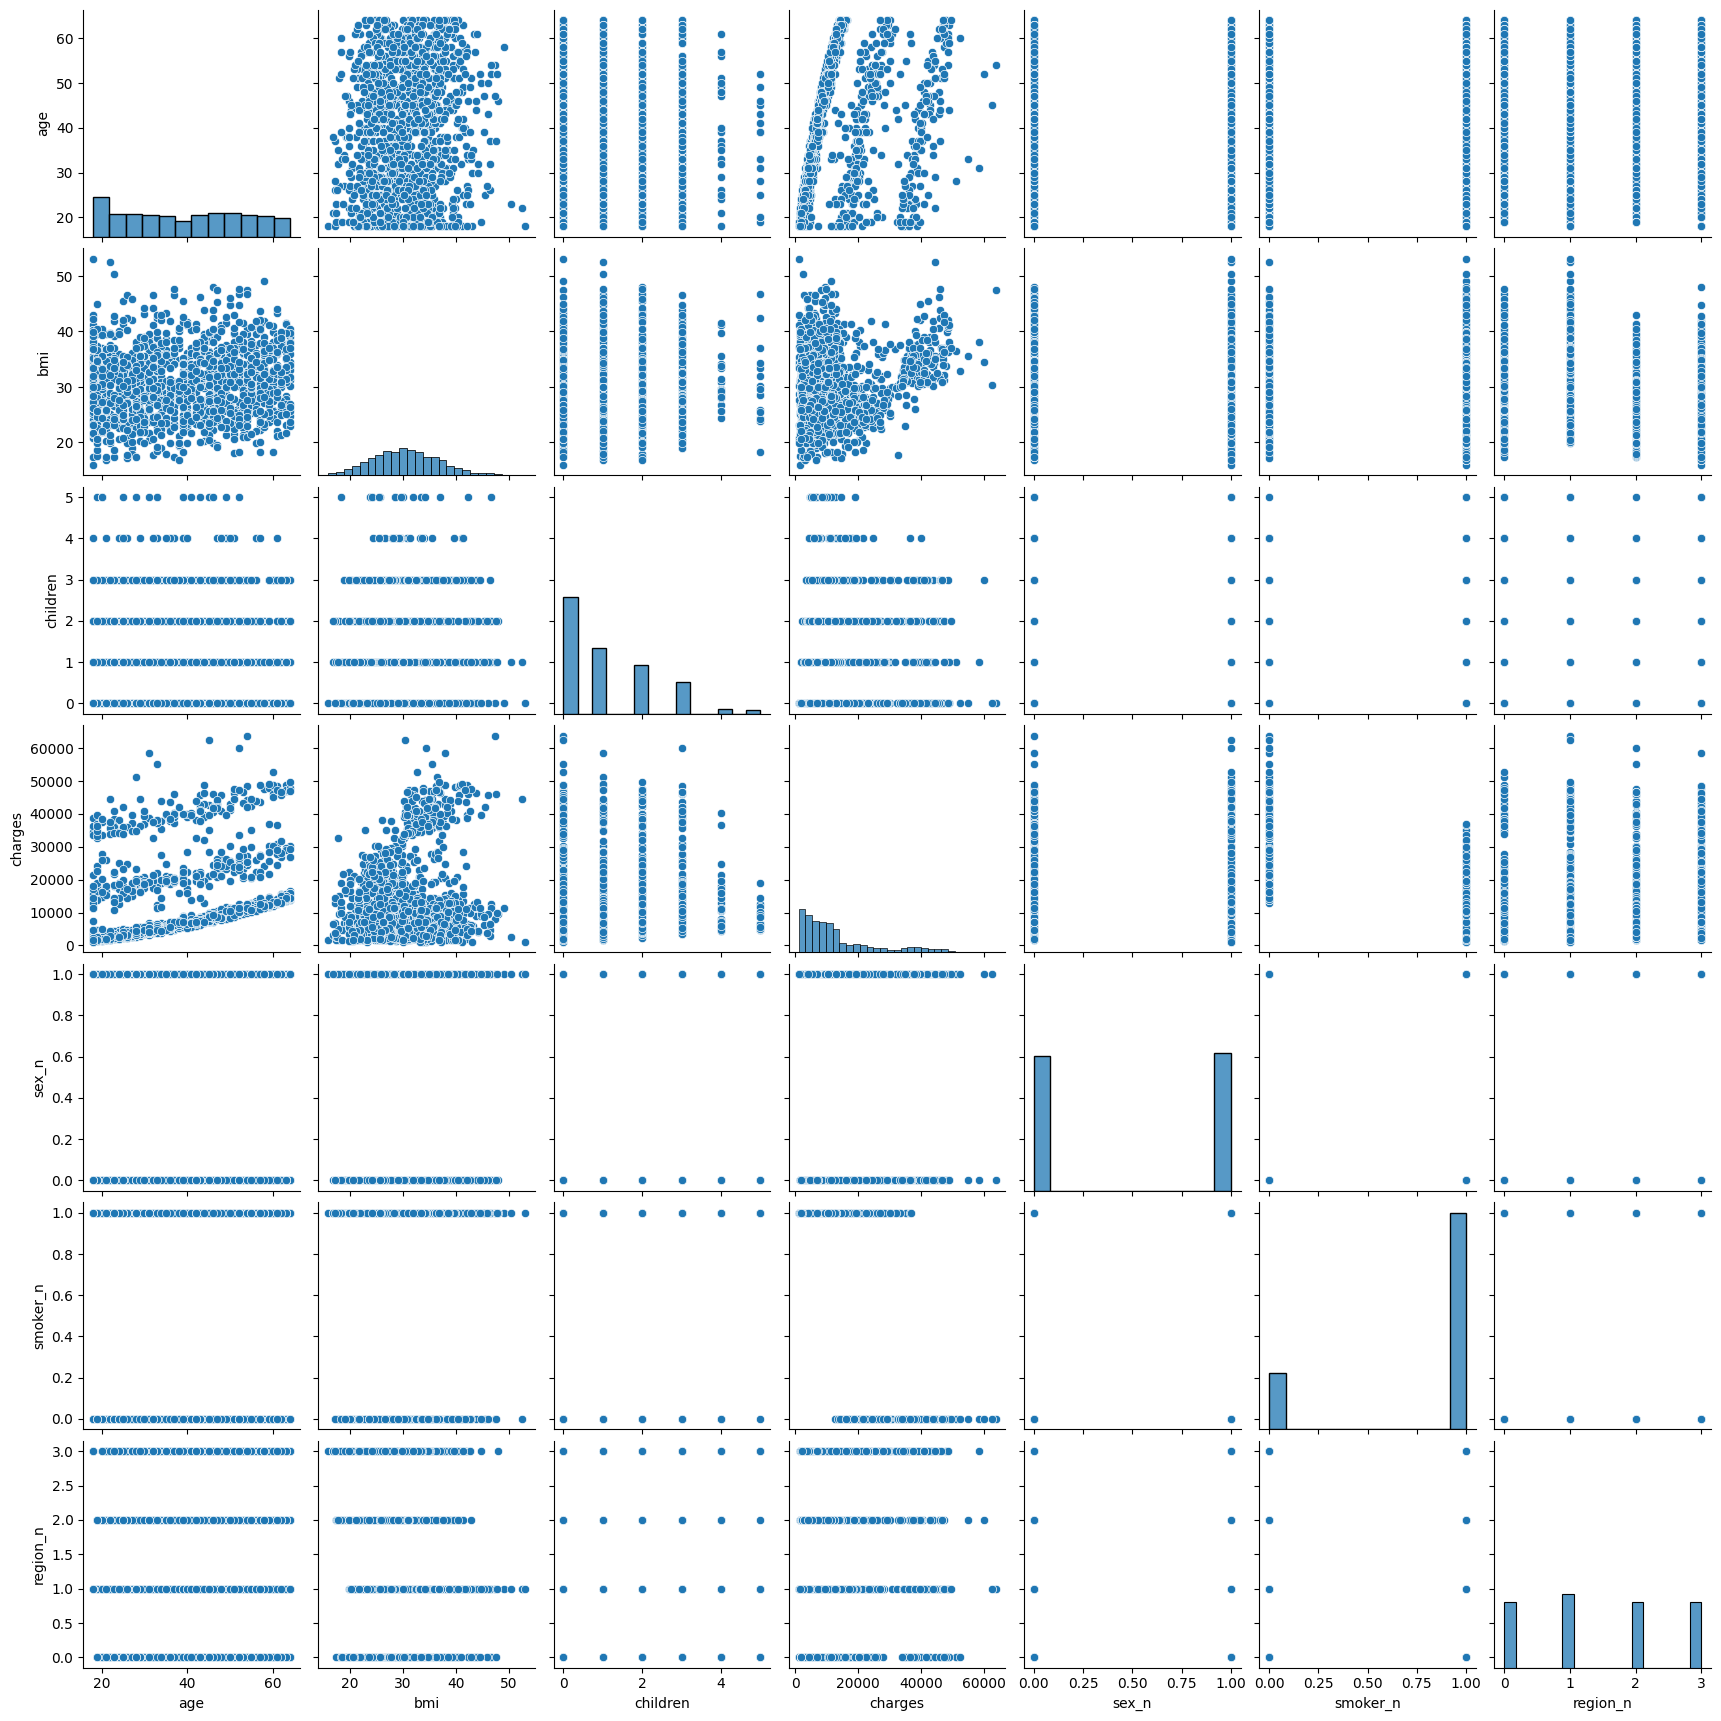

In [16]:
sns.pairplot(data= total_data)

DIA 2 FEATURE ENGENIERING 

analizar outliers 

In [17]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


se intuye algo en charges y bmi 

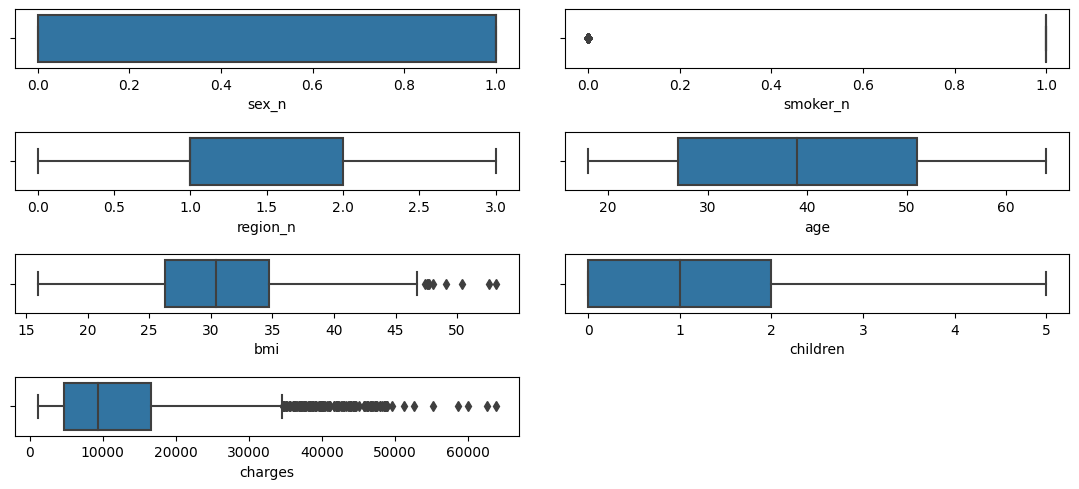

In [18]:

var_num = ["sex_n", "smoker_n", "region_n","age", "bmi", "children", "charges" ]

fig, axis = plt.subplots(4, 2, figsize=( 11, 5))

sns.boxplot( ax = axis[0,0], data = total_data, x= "sex_n")
sns.boxplot( ax = axis[0,1], data = total_data, x= "smoker_n")
sns.boxplot( ax = axis[1,0], data = total_data, x= "region_n")
sns.boxplot( ax = axis[1,1], data = total_data, x= "age")
sns.boxplot( ax = axis[2,0], data = total_data, x= "bmi")
sns.boxplot( ax = axis[2,1], data = total_data, x= "children")
sns.boxplot( ax = axis[3,0], data = total_data, x= "charges")



plt.tight_layout()
fig.delaxes(axis[3,1])
plt.show()

outliers en bmi y charges, que tienen mucha dinámica de correlación . pueden dar info extra. No quito, ni le doy valor 0, ni media 

ANALISIS DE VALORES FALTANTES 

In [19]:
total_data.isnull()
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

no tiene faltantes 

ESCALADO DE VALORES 

In [20]:
total_data_num = total_data[["sex_n", "smoker_n", "region_n","age", "bmi", "children", "charges" ]]

from sklearn.preprocessing import MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()

predict_variables = ["sex_n", "smoker_n", "region_n","age", "bmi", "children"]
#####MUY IMPORTANTE NO SE NORMALIZA LA TARGET
total_data_norm = norm_model.fit_transform(total_data_num[predict_variables])
total_data_norm = pd.DataFrame(total_data_norm, index = total_data_num.index, columns = predict_variables)
total_data_norm["charges"] = total_data_num["charges"]
total_data_norm

,sex_n,smoker_n,region_n,age,bmi,children,charges
0,0.0,0.0,0.000000,0.021739,0.321227,0.0,16884.92400
1,1.0,1.0,0.333333,0.000000,0.479150,0.2,1725.55230
2,1.0,1.0,0.333333,0.217391,0.458434,0.6,4449.46200
3,1.0,1.0,0.666667,0.326087,0.181464,0.0,21984.47061
4,1.0,1.0,0.666667,0.304348,0.347592,0.0,3866.85520
...,...,...,...,...,...,...,...
1333,1.0,1.0,0.666667,0.695652,0.403820,0.6,10600.54830
1334,0.0,1.0,1.000000,0.000000,0.429379,0.0,2205.98080
1335,0.0,1.0,0.333333,0.000000,0.562012,0.0,1629.83350
1336,0.0,1.0,0.000000,0.065217,0.264730,0.0,2007.94500


                            DIA 3

SELECCION DE CARACTERISTICAS

In [24]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = total_data_norm.drop("charges", axis = 1)
y = total_data_norm["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 4 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_regression, k = 3)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,smoker_n,age,bmi
0,1.0,0.108696,0.230024
1,1.0,0.065217,0.263250
2,1.0,0.739130,0.580172
3,1.0,0.978261,0.686306
4,1.0,0.630435,0.286252


las variables clave son smoker y age 

toca guardar

In [22]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

In [23]:
X_train_sel.to_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_train.csv", index=False)
X_test_sel.to_csv("/workspaces/joseVentlinearreg/data/processed/clean_medical_test.csv", index=False)